In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.datasets import cifar10 #Data Set
from tensorflow.keras.utils import to_categorical # Encoding
from tensorflow.keras.models import Sequential #Model 
from tensorflow.keras.layers import Conv2D , MaxPool2D #Feature Extraction
from tensorflow.keras.layers import Flatten , Dense , Dropout #Classsification
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data Agumentation 

from sklearn.metrics import classification_report

### 1)Veri Setinin Yüklenmesi

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

### 2)Veri Seti Görselleştirme

C:\Users\emirh\AppData\Local\Temp\ipykernel_2368\2410640420.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_labels[int(y_train[i])]


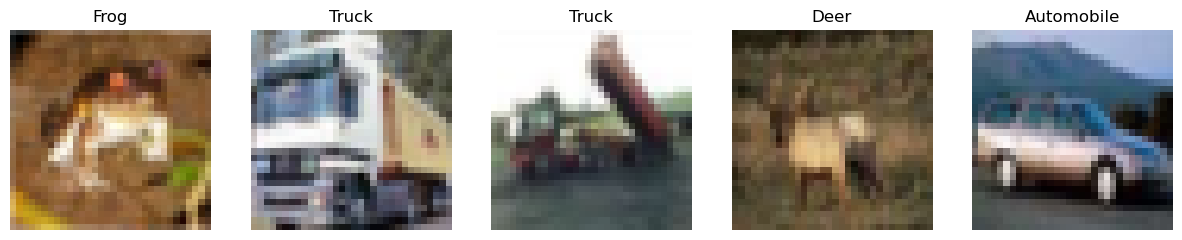

In [5]:
class_labels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
fig,axes = plt.subplots(1,5,figsize=(15,10))

for i in range(5):
    axes[i].imshow(x_train[i])
    label = class_labels[int(y_train[i])]
    axes[i].set_title(label)
    axes[i].axis("off")
plt.show()

### 3)Veri Seti Normalizasyonu

In [6]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

One Hot Encoding 

In [7]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### 4)Veri Arttırımı (Data Agumentation)

In [8]:
datagen = ImageDataGenerator(
    rotation_range = 20 , # 20 dereceye kadar döndürme işlemi
    width_shift_range = 0.2, # Görüntüyü Yatayda %20 kaydırma
    height_shift_range = 0.2, # Görüntüyü dikeyde %20 kaydırma
    shear_range = 0.2, # Görüntü üzerinde %20 kaydırma 
    zoom_range = 0.2, # Görüntüye %20 lik bir zoom yapma 
    horizontal_flip = True, # Görüntüyü yatayda ters çevirme
    fill_mode = "nearest", # Boş alanları doldurmak için en yakın değerleri kullan
)
datagen.fit(x_train)

### 5)CNN Modelin Oluşturulması

In [9]:
model = Sequential()

Feature Extraction : CONV => RELU => CONV => RELU => POOL => DROPOUT

In [10]:
model.add(Conv2D(32,(3,3),padding="same" , activation = "relu" , input_shape = x_train.shape[1:] ))
model.add(Conv2D(32,(3,3) , activation = "relu" ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Bağlantıların %25 'ini rastgele olarak kapatma işlemi

C:\Users\emirh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Feature Extraction : CONV => RELU => CONV => RELU => POOL => DROPOUT

In [11]:
model.add(Conv2D(64,(3,3),padding="same" , activation = "relu" ))
model.add(Conv2D(62,(3,3) , activation = "relu" ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

Classification : FLATTEN => DENSE => RELU => CONV => RELU => POOL => DROPOUT

In [12]:
model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 62)          │          35,774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 62)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 62)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2232)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,143,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,840 (4.63 MB)

 Trainable params: 1,212,840 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

### 6)Model Derleme 

learning_rate : Öğrenme işleminde doğru parametreleri bulmak için kullanılan katsayı.
decay : Öğrenme işlemi ilerledikçe katsayının değişme oranını azaltma ve optimum değerlerin buluması işlemi.

In [14]:
model.compile(optimizer=RMSprop(learning_rate=0.0001,decay = 1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

C:\Users\emirh\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [15]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=256),epochs=50,validation_data=(x_test,y_test))

C:\Users\emirh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.1556 - loss: 2.2202 - val_accuracy: 0.3238 - val_loss: 1.9279
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.2764 - loss: 1.9693 - val_accuracy: 0.3633 - val_loss: 1.7978
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.3067 - loss: 1.8917 - val_accuracy: 0.3887 - val_loss: 1.7212
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.3254 - loss: 1.8412 - val_accuracy: 0.3964 - val_loss: 1.6755
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.3391 - loss: 1.8068 - val_accuracy: 0.4068 - val_loss: 1.6360
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.3573 - loss: 1.7645 - val_accuracy: 0.3966 - val_loss: 1.6942
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.3627 - loss: 1.7397 - val_accuracy: 0.4347 - val_loss: 1.5424
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.3716 - loss: 1

### 7)Modelin Test Edilmesi

In [16]:
y_pred = model.predict(x_test) # [0-1] arasında değişen değerlerdir ve örneğin 0.8 olursa %80 bu sınıfa ait denir.
y_pred_class = np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [17]:
y_true = np.argmax(y_test,axis=1)

In [18]:
report = classification_report(y_true,y_pred_class,target_names=class_labels)

In [19]:
print(report)

              precision    recall  f1-score   support

    Airplane       0.75      0.64      0.69      1000
  Automobile       0.66      0.82      0.73      1000
        Bird       0.72      0.33      0.45      1000
         Cat       0.57      0.23      0.33      1000
        Deer       0.67      0.38      0.48      1000
         Dog       0.56      0.55      0.56      1000
        Frog       0.48      0.89      0.62      1000
       Horse       0.59      0.77      0.67      1000
        Ship       0.79      0.71      0.75      1000
       Truck       0.57      0.82      0.67      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.60     10000
weighted avg       0.64      0.61      0.60     10000



### 8)Modelin Başarımını Görselleştirme

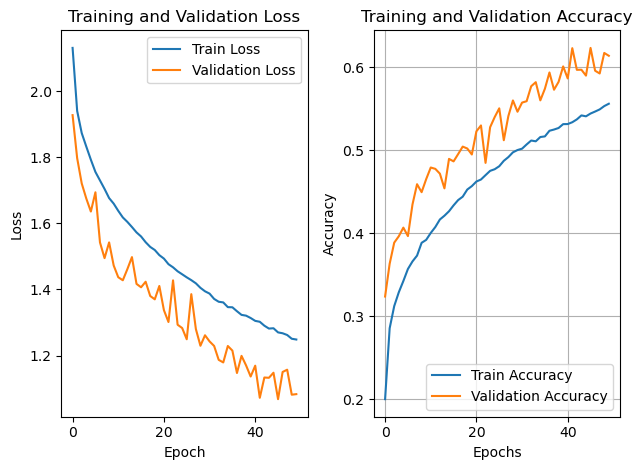

In [20]:
plt.figure()
#Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

#Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()